# Problem Setting: Maze Solving

This notebook demonstrates a simple maze solving algorithm based on Deep Q-Learning. According to the Reinforcement learning theory, the Q-Learning algorithm allow the agent to search the goal in 2D maze map. The agent can search and learn by the reward values in each point.

In relation to reinforcement learning theory, the state of agent is 2D position coordinates and the action is to dicide the direction of movement. Within the wall, the agent is movable in a cross direction and can advance by one point at a time. After moving into a new position, the agent can obtain a reward. On greedy searching, this extrinsically motivated agent performs in order to obtain some reward as high as possible. Each reward value is plot in map.

The map data that agent will observe is as follow.

$$\boldsymbol{M}_{reward} =
\begin{pmatrix}
r_{1,1} & \cdots & r_{1,j} & \cdots & r_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
r_{i,1} &        & r_{i,j} & \cdots & r_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
r_{n,1} & \cdots & r_{n,j} & \cdots & r_{n,m}
\end{pmatrix}
$$

where $(i, j)$ is tuple of 2D position coordinates in the maze map. Then $r_{i,j}$ is reward value that the agent can get by arriving the point: $(i, j)$. This notebook defines the reward function as follows

$$r_{i, j} = 1.0 - \sqrt{(i - G_i)^2 + (j - G_j)^2} - \mathcal{P}_{repeating}$$

where $(G_i, G_j)$ is the tuple of goal point and $\mathcal{P}_{repeating}$ is a penalty point in the case that the agent will revisit points that the agent have already reached. If the agent reaches the goal, the reward is $1.0$. This will be maximum reward.

The state of agent is $s_{i,j}$. In this case, the form of agent's state transition matrix is designed to correspond with $\boldsymbol{M}_{reward}$ as follow.

$$\boldsymbol{M}_{state} =
\begin{pmatrix}
s_{1,1} & \cdots & s_{1,j} & \cdots & s_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
s_{i,1} &        & s_{i,j} & \cdots & s_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
s_{n,1} & \cdots & s_{n,j} & \cdots & s_{n,m}
\end{pmatrix}
$$

The possible actions of agent can be limited by $s_{i,j}$. Agent can select adjacent elements in $\boldsymbol{M}_{state}$.

So in this problem setting, the maze map data can be as generated below in detail.

## Problem solution: Q-Learning algorithm.

The Q-Learning algorithm has already been demonstrated with similar problem setting in [search_maze_by_q_learning.ipynb](search_maze_by_q_learning.ipynb).

## Structural extension: Deep Learning.

The Reinforcement learning theory presents several issues from a perspective of deep learning theory. Firstly, deep learning applications have required large amounts of handlabelled training data. Reinforcement learning algorithms, on the other hand, must be able to learn from a scalar reward signal that is frequently sparse, noisy and delayed.

The difference between the two theories is not only the type of data but also the timing to be observed. The delay between taking actions and receiving rewards, which can be thousands of timesteps long, seems particularly daunting when compared to the direct association between inputs and targets found in supervised learning. 

Another issue is that most deep learning algorithms assume the data samples to be independent, while in reinforcement learning one typically encounters sequences of highly correlated states. Furthermore, in Reinforcement learning the data distribution changes as the algorithm learns new behaviours, which can be problematic for deep learning methods that assume a fixed underlying distribution.

# Problem re-setting: Generalisation, or a function approximation.

This notebook considers problem setteing in which an agent interacts with an environment $\mathcal{E}$, in this case the Maze solving, in a sequence of actions, observations and rewards. At each time-step the agent selects an action at from the set of legal game actions, 

$$\boldsymbol{M}_{action} =
\begin{pmatrix}
a_{1,1} & \cdots & a_{1,j} & \cdots & a_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
a_{i,1} &        & a_{i,j} & \cdots & a_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
a_{n,1} & \cdots & a_{n,j} & \cdots & a_{n,m}
\end{pmatrix}
$$.

$\boldsymbol{M}_{state}$, $\boldsymbol{M}_{action}$, and $\boldsymbol{M}_{reward}$ can be assembled as a matrix of rank-3 of 3 channels and considered as a feature points which will be observed by the agent. The state/action-value function is as follows

$$Q(s, a) = Q(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$$

The goal of the agent is to interact with the Maze map by selecting actions in a way that maximises future rewards. We can make the standard assumption that future rewards are discounted by a factor of $\gamma$ per time-step, and define the future discounted return at time $t$ as $R_t = \sum_{t'=t}^{T}\gamma^{t'-t}r_{t'}$
, where $T$ is the time-step at which the agent will reach the goal. This notebook defines the optimal state/action-value function $Q^{\ast}(s, a) = Q^{\ast}(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$ as the maximum expected return achievable by following any strategy, after seeing some state $s$ and then taking some action $a$, $Q^{\ast}(s, a) = \max \pi \mathbb{E}[R_t \mid s_t = s, a_t = a, \pi ]$, where $\pi$ is a policy mapping sequences to actions (or distributions over actions).

The optimal state/action-value function obeys an important identity known as the Bellman equation. This is based on the following *intuition*: if the optimal value $Q^{\ast}(s', a')$ of the sequence $s'$ at the next time-step was known for all possible actions $a'$ , then the optimal strategy is to select the action $a'$ maximising the expected value of $r + \gamma Q^{\ast}(s', a')$, 

$$Q^{\ast}(s', a') = \mathbb{E}_{s' \sim \mathcal{E}}[r + \gamma \max_{a'} Q^{\ast}(s', a')\mid s, a]$$

The basic idea behind many reinforcement learning algorithms is to estimate the state/action-value function, by using the Bellman equation as an iterative update,

$$Q_{i+1}(s, a) = \mathbb{E}[r + \gamma \max_{a'}Q_i(s', a') \mid s, a]$$.

Such *value iteration algorithms* converge to the optimal state/action-value function, $Q_i \rightarrow Q^{\ast}$ as $i \rightarrow \infty$. In practice, this basic approach is totally impractical, because the state/action-value function is estimated separately for each sequence, without any **generalisation**. Instead, it is common to use a **function approximator** to estimate the state/action-value function,

$$Q(s, a; \theta) \approx Q^{\ast}(s, a)$$


## Problem solution: Deep Q-Network.

In this problem setting, the function of nerual network or deep learning is a function approximation with weights $\theta$ as a Q-Network. A Q-Network can be trained by minimising a loss functions $L_i(\theta_i)$ that changes at each iteration $i$,

$$L_i(\theta_i) = \mathbb{E}_{s, a \sim \rho(\cdot)}[y_i - Q(s, a, \theta_i)]^2$$

where $y_i = \mathbb{E}_{s' \sim \mathcal{E}}[r + \gamma \max_{a'} Q(s', a', \theta_{i-1}) \mid s, a]$ is the target for iteration $i$ and $\rho(\cdot)$ is a so-called behaviour distribution. This is probability distribution over states and actions. The parameters from the previous iteration $\theta_{i−1}$ are held fixed when optimising the loss function $L_i(\theta_i)$. Differentiating the loss function
with respect to the weights we arrive at the following gradient,

$$\nabla_{\theta_i}L_i(\theta_i) = \mathbb{E}_{s, a \sim \rho(\cdot);s' \sim \mathcal{E}}\left[\left(r + \gamma \max_{a'} Q(s', a'; \theta_{i-1}) - Q(s, a; \theta_i)\right)\nabla_{\theta_i}Q(s, a; \theta)\right]$$.

Because of computational complexity with high rank matrix: $Q(s, a) = Q(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$, this notebook adopts a **Deep convolutional neural networks(Deep CNNs)** and implements with library: [pydbm](https://github.com/chimera0/accel-brain-code/tree/master/Deep-Learning-by-means-of-Design-Pattern) which is Python library for building the CNNs.

In [1]:
# First convolution layer.
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
# Second convolution layer.
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
# Computation graph for first convolution layer.
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
# Computation graph for second convolution layer.
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2
# Logistic Function as activation function.
from pydbm.activation.logistic_function import LogisticFunction
# Tanh Function as activation function.
from pydbm.activation.tanh_function import TanhFunction
# ReLu Function as activation function.
from pydbm.activation.relu_function import ReLuFunction
# CNN as a Function Approximator.
from pyqlearning.functionapproximator.cnn_fa import CNNFA
# Deep Q-Network to solve Maze Problem.
from demo_maze_deep_q_network import MazeDeepQNetwork

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 4

# First convolution layer.
conv1 = ConvolutionLayer1(
    # Computation graph for first convolution layer.
    ConvGraph1(
        # Logistic function as activation function.
        activation_function=TanhFunction(),
        # The number of `filter`.
        filter_num=batch_size,
        # The number of channel.
        channel=3,
        # The size of kernel.
        kernel_size=6,
        # The filter scale.
        scale=0.001,
        # The nubmer of stride.
        stride=2,
        # The number of zero-padding.
        pad=2
    )
)
# Second convolution layer.
conv2 = ConvolutionLayer2(
    # Computation graph for second convolution layer.
    ConvGraph2(
        # Logistic function as activation function.
        activation_function=TanhFunction(),
        # The number of `filter`.
        filter_num=batch_size,
        # The number of channel.
        channel=batch_size,
        # The size of kernel.
        kernel_size=3,
        # The filter scale.
        scale=0.001,
        # The nubmer of stride.
        stride=1,
        # The number of zero-padding.
        pad=1
    )
)

layerable_cnn_list=[
    conv1, 
    conv2
]


In [3]:
function_approximator = CNNFA(
    batch_size=batch_size,
    layerable_cnn_list=layerable_cnn_list,
    learning_rate=1e-05,
    computable_loss=None,
    opt_params=None,
    verificatable_result=None,
    pre_learned_path_list=None,
    fc_activation_function=TanhFunction(),
    verbose_mode=True
)

Setup CNN layers and the parameters.


In [4]:
deep_q_learning = MazeDeepQNetwork(function_approximator, map_size=(10, 10), memory_num=50, repeating_penalty=1.0)
deep_q_learning.epsilon_greedy_rate = 0.7
deep_q_learning.alpha_value = 1e-05
deep_q_learning.gamma_value = 0.01

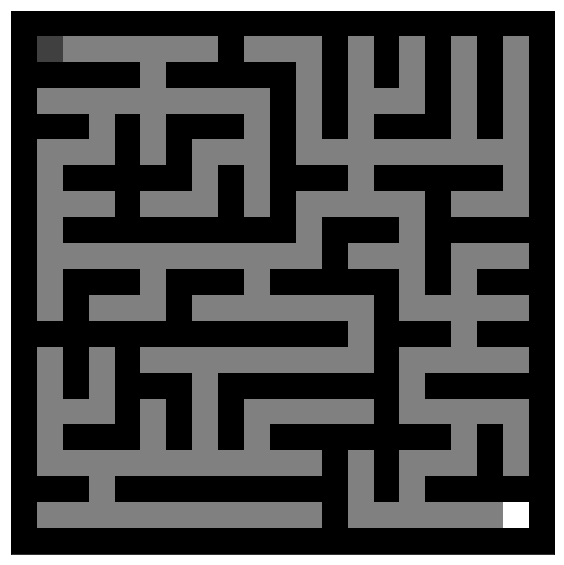

In [49]:
_ = plt.figure(figsize=(10, 10))
plt.imshow(deep_q_learning.map_arr, cmap="gray")
plt.tick_params(labelbottom="off",bottom="off")
plt.tick_params(labelleft="off",left="off")
plt.show()
plt.close()

In [6]:
game_n = 5

init_state_arr = deep_q_learning.extract_now_state().copy()
for _ in range(game_n):
    deep_q_learning.learn(state_arr=init_state_arr, limit=5000)
    if deep_q_learning.check_the_end_flag(deep_q_learning.extract_now_state()) is True:
        print("Goal!")
    else:
        print("not Goal!")

    deep_q_learning.t = 1

not Goal!
not Goal!
Goal!
Goal!
Goal!


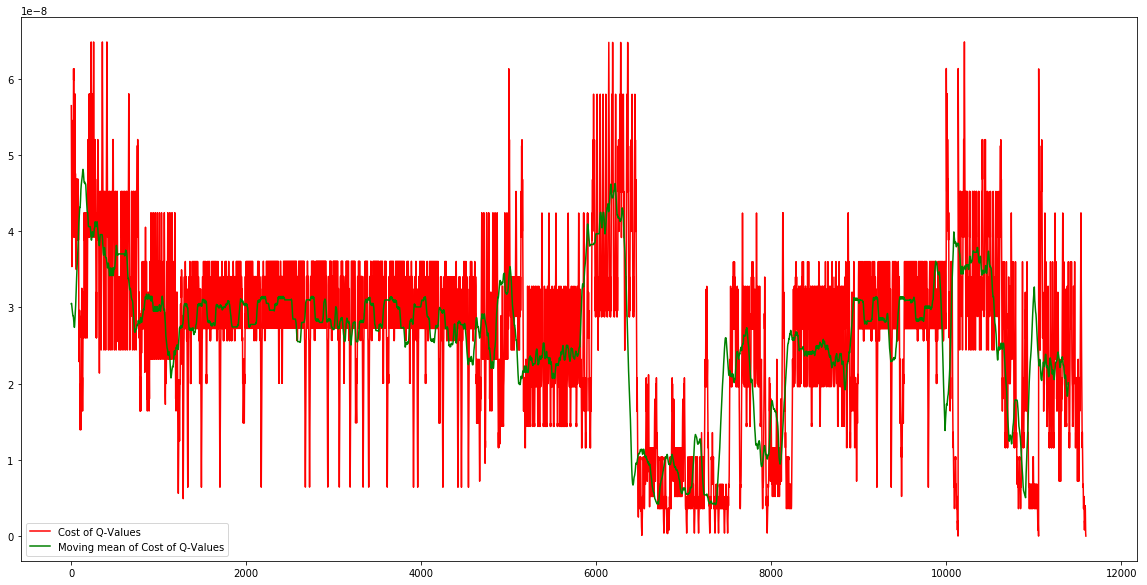

In [48]:
import pandas as pd
df = pd.DataFrame(function_approximator.q_logs_list, columns=["q", "real_q", "cost"])


num = 100
b = np.ones(num)/num

q_cost_arr = np.convolve(df.cost.values[:], b, mode="same")[num:-num]
q_c_arr = np.convolve(df.q.values[:], b, mode='same')[num:-num]
real_q_c_arr = np.convolve(df.real_q.values[:], b, mode='same')[num:-num]

plt.figure(figsize=(20, 10))
plt.plot(df.cost.values[:], label="Cost of Q-Values", color="red")
plt.plot(q_cost_arr, label="Moving mean of Cost of Q-Values", color="green")
plt.legend()
plt.show()
plt.close()

In [37]:
deep_q_learning.epsilon_greedy_rate = 0.7
deep_q_learning.t = 1
route_list = deep_q_learning.inference(state_arr=init_state_arr, limit=10000)

In [39]:
result_df = pd.DataFrame(route_list, columns=["x", "y", "q_value"])

In [50]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("/usr/share/fonts/monotype/garamond.ttf", 16)

img_list = []
#result_df.q_value *= 10

for i in range(result_df.shape[0]):
    x = result_df.x.values[i]
    y = result_df.y.values[i]
    q = result_df.q_value.values[i]

    now_map_arr = deep_q_learning.map_arr.copy()
    now_map_arr[x, y] = 2
    now_map_arr = 255 * (now_map_arr - now_map_arr.min()) / (now_map_arr.max() - now_map_arr.min())
    img = Image.fromarray(np.uint8(now_map_arr))
    img = img.resize((400, 400))

    bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
    bg_img.paste(img, (10, 10))
    draw = ImageDraw.Draw(bg_img)
    draw.multiline_text((5, 5), 'Inferenced Q-Value: ' + str(q), fill=(255, 255, 255), font=font)
    img_list.append(bg_img)

img_list[0].save(
    'img/DQN_agent_demo.gif',
    save_all=True,
    append_images=img_list[1:], 
    optimize=False, 
    duration=40, 
    loop=1
)


<img src="img/DQN_agent_demo.gif">

# References

- Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., & Riedmiller, M. (2013). Playing atari with deep reinforcement learning. arXiv preprint arXiv:1312.5602.